# Import Library

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data set

In [59]:
datafile = pd.read_csv("olympics.csv")
datafile.head(5)

,athlete_id,name,born_date,born_city,born_region,born_country,NOC,height_cm,weight_kg,died_date
0,1,Jean-François Blanchy,1886-12-12,Bordeaux,Gironde,FRA,France,NaN,NaN,1960-10-02
1,2,Arnaud Boetsch,1969-04-01,Meulan,Yvelines,FRA,France,183.0,76.0,NaN
2,3,Jean Borotra,1898-08-13,Biarritz,Pyrénées-Atlantiques,FRA,France,183.0,76.0,1994-07-17
3,4,Jacques Brugnon,1895-05-11,Paris VIIIe,Paris,FRA,France,168.0,64.0,1978-03-20
4,5,Albert Canet,1878-04-17,Wandsworth,England,GBR,France,NaN,NaN,1930-07-25


# Information of dataset

#### Dimension

In [60]:
datafile.shape

(145500, 10)

* we can say that ` there are 145500 records across the 10 variables `

#### Observation count

In [61]:
datafile.size

1455000

* In this dataset contains `1455000 observation `

#### Colunm names

In [62]:
datafile.columns

Index(['athlete_id', 'name', 'born_date', 'born_city', 'born_region',
       'born_country', 'NOC', 'height_cm', 'weight_kg', 'died_date'],
      dtype='object')

* colunm names : `'athlete_id', 'name', 'born_date', 'born_city', 'born_region' ,'born_country', 'NOC', 'height_cm', 'weight_kg', 'died_date' `

* column count = 10

#### data types of each columns

In [63]:
datafile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145500 entries, 0 to 145499
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   athlete_id    145500 non-null  int64  
 1   name          145500 non-null  object 
 2   born_date     143693 non-null  object 
 3   born_city     110908 non-null  object 
 4   born_region   110908 non-null  object 
 5   born_country  110908 non-null  object 
 6   NOC           145499 non-null  object 
 7   height_cm     106651 non-null  float64
 8   weight_kg     102070 non-null  float64
 9   died_date     33940 non-null   object 
dtypes: float64(2), int64(1), object(7)
memory usage: 11.1+ MB


* we can see that 
    * athlete_id    : int
    * height_cm ,  weight_kg  : float 
    * born_date,born_city,born_region,born_country,NOC ,name,died_date  = object

* we convert datatype of variable `born_date and died_date ` to `datetime data type`. because it is appropriate for that variables.

#### convert data types

In [64]:
datafile["born_date"] = pd.to_datetime(datafile["born_date"])
datafile["died_date"] = pd.to_datetime(datafile["died_date"])

In [65]:
datafile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145500 entries, 0 to 145499
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   athlete_id    145500 non-null  int64         
 1   name          145500 non-null  object        
 2   born_date     143693 non-null  datetime64[ns]
 3   born_city     110908 non-null  object        
 4   born_region   110908 non-null  object        
 5   born_country  110908 non-null  object        
 6   NOC           145499 non-null  object        
 7   height_cm     106651 non-null  float64       
 8   weight_kg     102070 non-null  float64       
 9   died_date     33940 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(1), object(5)
memory usage: 11.1+ MB


# Checking Missing values of data set

#### all Missing values count

In [66]:
sum(datafile.isna().sum())

299423

* All missing values count : `299423`

#### missing values for each column

In [67]:
datafile.isna().sum()

athlete_id           0
name                 0
born_date         1807
born_city        34592
born_region      34592
born_country     34592
NOC                  1
height_cm        38849
weight_kg        43430
died_date       111560
dtype: int64

* ` column name` : ` missing values count `
* athlete_id    :       0
* name          :       0
* born_date     :    1807
* born_city     :   34592
* born_region   :   34592
* born_country  :   34592
* NOC           :       1
* height_cm     :   38849
* weight_kg     :   43430
* died_date     :  111560

In [68]:
missing_dt = pd.DataFrame(datafile.isna().sum())
missing_dt = pd.DataFrame(missing_dt.values.reshape(1,10),columns=datafile.columns)

missing_dt.loc[:,:].values

array([[     0,      0,   1807,  34592,  34592,  34592,      1,  38849,
         43430, 111560]], dtype=int64)

In [69]:
missing_dt.loc[:,:].values[0]

array([     0,      0,   1807,  34592,  34592,  34592,      1,  38849,
        43430, 111560], dtype=int64)

#### visualize missing values for each column

Text(0, 0.5, 'proportion of missing values')

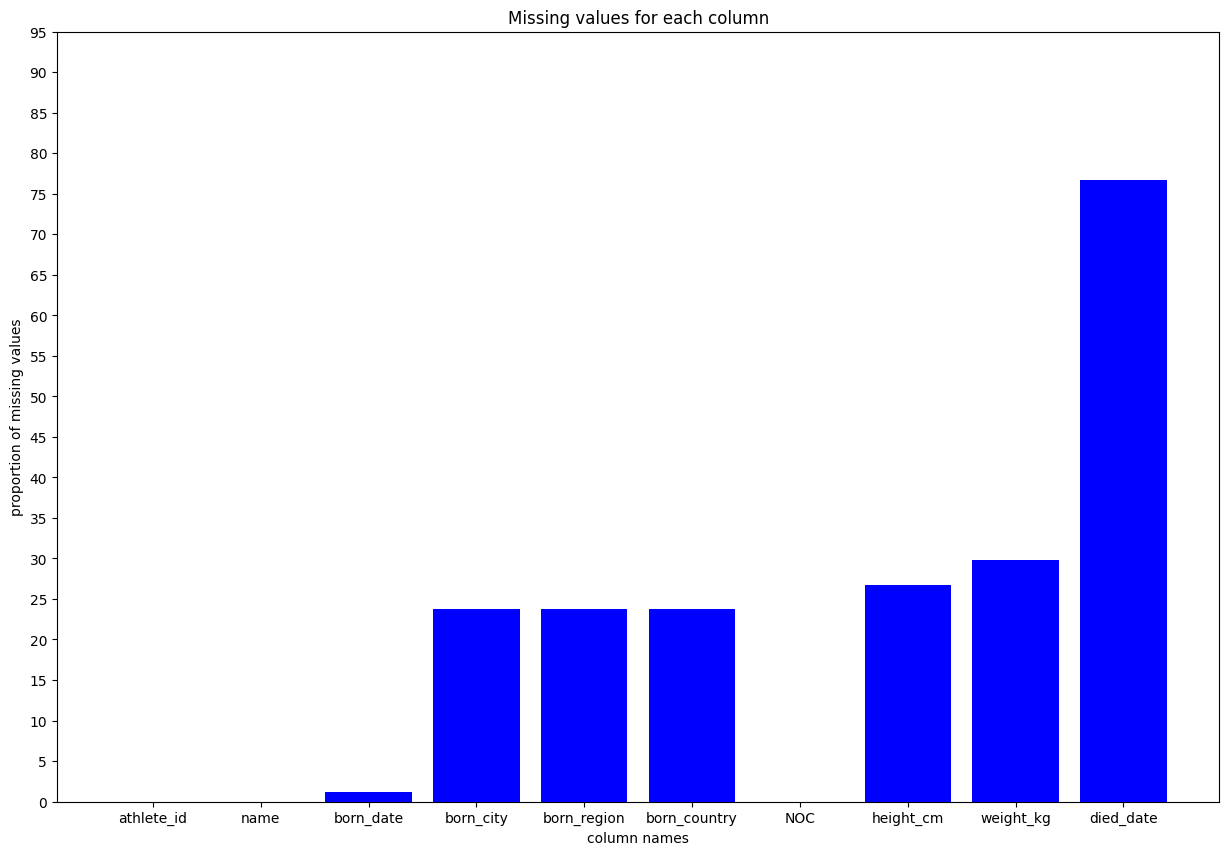

In [70]:
plt.figure(figsize=(15,10))
plt.bar(datafile.columns, (missing_dt.loc[:,:].values[0]/len(datafile))*100 ,color = "blue")
plt.yticks(range(0,100,5))
plt.title("Missing values for each column")
plt.xlabel("column names")
plt.ylabel("proportion of missing values")

#### drop missing values

In [73]:
new_data = datafile.dropna()

* Now no missing values anymore in dataset

# Extract information from each column

In [74]:
new_data.columns

Index(['athlete_id', 'name', 'born_date', 'born_city', 'born_region',
       'born_country', 'NOC', 'height_cm', 'weight_kg', 'died_date'],
      dtype='object')

### column : `born_date`

#### Min and max

In [89]:
new_data["born_date"].sort_values().min() , new_data["born_date"].sort_values().max()

(Timestamp('1850-05-07 00:00:00'), Timestamp('2002-04-25 00:00:00'))

* we can see older one's birthday : `1850-05-07`
* we can see younger one's birthday : `2002-04-25`

#### Finding their age and add it to dataframe

In [105]:
new_data["Age"] = new_data["died_date"] - new_data["born_date"]